In [2]:
import pywt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
db_wavelets = pywt.wavelist('db')[:5]
print(db_wavelets)

['db1', 'db2', 'db3', 'db4', 'db5']


In [5]:
signal = [1,2,2,5,4,2,3,5]

In [6]:
(cA1, cD1) = pywt.dwt(signal, 'db2', 'smooth')

In [8]:
cA1

array([-0.51763809,  1.95723564,  5.78626377,  3.63026825,  6.03579163])

In [9]:
coeffs = pywt.wavedec(signal, 'db2', level=8)

D:\Users\mensa\anaconda3\envs\nilmtk-env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [ ]:
(cA1, cD1) = pywt.dwt(signal, 'db2', 'smooth')
reconstructed_signal = pywt.idwt(cA1, cD1, 'db2', 'smooth')

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(signal, label='signal')
ax.plot(reconstructed_signal, label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
plt.show()

In [ ]:
coeffs = pywt.wavedec(signal, 'db2', level=8)
reconstructed_signal = pywt.waverec(coeffs, 'db2')

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(signal[:1000], label='signal')
ax.plot(reconstructed_signal[:1000], label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
ax.set_title('de- and reconstruction using wavedec()')
plt.show()

In [25]:
def plot_wavelet(time, signal, scales, 
                 waveletname = 'cmor', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Period (years)', 
                 xlabel = 'Time'):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()

def plot_signal_plus_average(time, signal, average_over = 5):
    fig, ax = plt.subplots(figsize=(15, 3))
    time_ave, signal_ave = get_ave_values(time, signal, average_over)
    ax.plot(time, signal, label='signal')
    ax.plot(time_ave, signal_ave, label = 'time average (n={})'.format(5))
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Signal Amplitude', fontsize=18)
    ax.set_title('Signal + Time Average', fontsize=18)
    ax.set_xlabel('Time', fontsize=18)
    ax.legend()
    plt.show()
    
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def plot_fft_plus_power(time, signal):
    dt = time[1] - time[0]
    N = len(signal)
    fs = 1/dt
    
    fig, ax = plt.subplots(figsize=(15, 3))
    variance = np.std(signal)**2
    f_values, fft_values = get_fft_values(signal, dt, N, fs)
    fft_power = variance * abs(fft_values) ** 2     # FFT power spectrum
    ax.plot(f_values, fft_values, 'r-', label='Fourier Transform')
    ax.plot(f_values, fft_power, 'k--', linewidth=1, label='FFT Power Spectrum')
    ax.set_xlabel('Frequency [Hz / year]', fontsize=18)
    ax.set_ylabel('Amplitude', fontsize=18)
    ax.legend()
    plt.show()

In [26]:
dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df_nino = pd.read_table(dataset)


In [28]:
N = df_nino.shape[0]
t0=1871
dt=0.25
time = np.arange(0, N) * dt + t0
signal = df_nino.values.squeeze()
scales = np.arange(1, 128)
#plot_signal_plus_average(time, signal)
#plot_fft_plus_power(time, signal)
#plot_wavelet(time, signal, scales)

In [29]:
coeffs = pywt.wavedec(signal, 'db2', level=8)
reconstructed_signal = pywt.waverec(coeffs, 'db2')

#fig, ax = plt.subplots(figsize=(8,4))
#ax.plot(signal[:1000], label='signal')
#ax.plot(reconstructed_signal[:1000], label='reconstructed signal', linestyle='--')
#ax.legend(loc='upper left')
#ax.set_title('de- and reconstruction using wavedec()')
#plt.show()

D:\Users\mensa\anaconda3\envs\nilmtk-env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [31]:
reconstructed_signal

array([-3.00000000e-01, -1.40000000e-01, -4.10000000e-01, -4.60000000e-01,
       -6.60000000e-01, -5.00000000e-01, -8.00000000e-01, -9.50000000e-01,
       -7.20000000e-01, -3.10000000e-01, -7.10000000e-01, -1.04000000e+00,
       -7.70000000e-01, -8.60000000e-01, -8.40000000e-01, -4.10000000e-01,
       -4.90000000e-01, -4.80000000e-01, -7.20000000e-01, -1.21000000e+00,
       -8.00000000e-01,  1.60000000e-01,  4.60000000e-01,  4.00000000e-01,
        1.00000000e+00,  2.17000000e+00,  2.50000000e+00,  2.34000000e+00,
        8.00000000e-01,  1.40000000e-01, -6.00000000e-02, -3.40000000e-01,
       -7.10000000e-01, -3.40000000e-01, -7.30000000e-01, -4.80000000e-01,
       -1.10000000e-01,  2.20000000e-01,  5.10000000e-01,  5.10000000e-01,
        2.50000000e-01, -1.00000000e-01, -3.30000000e-01, -4.20000000e-01,
       -2.30000000e-01, -5.30000000e-01, -4.40000000e-01, -3.00000000e-01,
        1.50000000e-01,  9.00000000e-02,  1.90000000e-01, -6.00000000e-02,
        2.50000000e-01,  

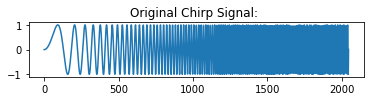

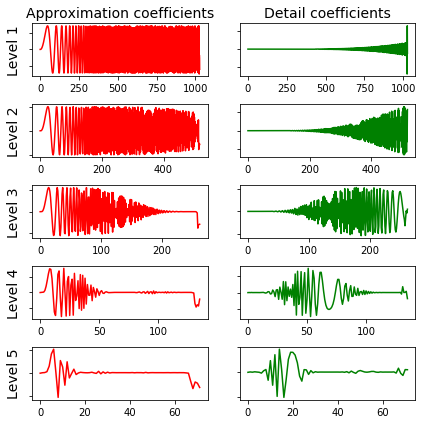

In [3]:
x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'

fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

Figure 7. The approximation and detail coefficients of the sym5 wavelet (level 1 to 5) applied on a chirp signal, from level 1 to 5. On the left we can see a schematic representation of the high pass and low pass filters applied on the signal at each level.
In Figure 7 we can see our chirp signal, and the DWT applied to it subsequently. There are a few things to notice here:

In PyWavelets the DWT is applied with pywt.dwt()
The DWT return two sets of coefficients; the approximation coefficients and detail coefficients.
The approximation coefficients represent the output of the low pass filter (averaging filter) of the DWT.
The detail coefficients represent the output of the high pass filter (difference filter) of the DWT.
By applying the DWT again on the approximation coefficients of the previous DWT, we get the wavelet transform of the next level.
At each next level, the original signal is also sampled down by a factor of 2.

In [4]:
def plot_wavelet(time, signal, scales, 
                 waveletname = 'cmor', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Period (years)', 
                 xlabel = 'Time'):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()

def plot_signal_plus_average(time, signal, average_over = 5):
    fig, ax = plt.subplots(figsize=(15, 3))
    time_ave, signal_ave = get_ave_values(time, signal, average_over)
    ax.plot(time, signal, label='signal')
    ax.plot(time_ave, signal_ave, label = 'time average (n={})'.format(5))
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Signal Amplitude', fontsize=18)
    ax.set_title('Signal + Time Average', fontsize=18)
    ax.set_xlabel('Time', fontsize=18)
    ax.legend()
    plt.show()
    
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def plot_fft_plus_power(time, signal):
    dt = time[1] - time[0]
    N = len(signal)
    fs = 1/dt
    
    fig, ax = plt.subplots(figsize=(15, 3))
    variance = np.std(signal)**2
    f_values, fft_values = get_fft_values(signal, dt, N, fs)
    fft_power = variance * abs(fft_values) ** 2     # FFT power spectrum
    ax.plot(f_values, fft_values, 'r-', label='Fourier Transform')
    ax.plot(f_values, fft_power, 'k--', linewidth=1, label='FFT Power Spectrum')
    ax.set_xlabel('Frequency [Hz / year]', fontsize=18)
    ax.set_ylabel('Amplitude', fontsize=18)
    ax.legend()
    plt.show()

In [5]:
dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df_nino = pd.read_table(dataset)


In [9]:
N = df_nino.shape[0]
t0=1871
dt=0.25
time = np.arange(0, N) * dt + t0
signal = df_nino.values.squeeze()
scales = np.arange(1, 128)

In [13]:
#plot_signal_plus_average(time, signal)
#plot_fft_plus_power(time, signal)
#plot_wavelet(time, signal, scales)

### 3.3 Deconstructing a signal using the DWT

PyWavelets offers two different ways to deconstruct a signal.

1. We can either apply pywt.dwt() on a signal to retrieve the approximation coefficients. Then apply the DWT on the retrieved coefficients to get the second level coefficients and continue this process until you have reached the desired decomposition level.

2. Or we can apply pywt.wavedec() directly and retrieve all of the the detail coefficients up to some level n. This functions takes as input the original signal and the level n and returns the one set of approximation coefficients (of the n-th level) and n sets of detail coefficients (1 to n-th level).

(cA1, cD1) = pywt.dwt(signal, 'db2', 'smooth')
reconstructed_signal = pywt.idwt(cA1, cD1, 'db2', 'smooth')

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(signal, label='signal')
ax.plot(reconstructed_signal, label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
plt.show()

The second way is to use pywt.wavedec() to deconstruct and reconstruct a signal and it is probably the most simple way if you want to get higher-level coefficients.

D:\Users\mensa\anaconda3\envs\nilmtk-env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


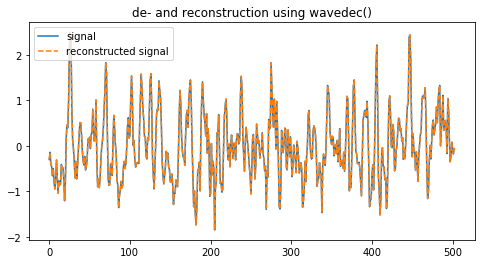

In [16]:
coeffs = pywt.wavedec(signal, 'db2', level=8)
reconstructed_signal = pywt.waverec(coeffs, 'db2')

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(signal[:1000], label='signal')
ax.plot(reconstructed_signal[:1000], label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
ax.set_title('de- and reconstruction using wavedec()')
plt.show()

### Using the Discrete Wavelet Transform to classify signals

So what kind of features can be generated from the set of values for each of the sub-bands? Of course this will highly depend on the type of signal and the application. But in general, below are some features which are most frequently used for signals.

1. Auto-regressive model coefficient values

2. (Shannon) Entropy values; entropy values can be taken as a measure of complexity of the signal.

3. Statistical features like:

    variance
    standard deviation
    Mean
    Median
    25th percentile value
    75th percentile value
    Root Mean Square value; square of the average of the squared amplitude values
    The mean of the derivative
    Zero crossing rate, i.e. the number of times a signal crosses y = 0
    Mean crossing rate, i.e. the number of times a signal crosses y = mean(y)

In [57]:
def calculate_entropy(list_values):
    counter_values = Counter(list_values).most_common()
    probabilities = [elem[1]/len(list_values) for elem in counter_values]
    entropy=scipy.stats.entropy(probabilities)
    return entropy

def calculate_statistics(list_values):
    n5 = np.nanpercentile(list_values, 5)
    n25 = np.nanpercentile(list_values, 25)
    n75 = np.nanpercentile(list_values, 75)
    n95 = np.nanpercentile(list_values, 95)
    median = np.nanpercentile(list_values, 50)
    mean = np.nanmean(list_values)
    std = np.nanstd(list_values)
    var = np.nanvar(list_values)
    rms = np.nanmean(np.sqrt(list_values**2))
    return [n5, n25, n75, n95, median, mean, std, var, rms]

#def calculate_crossings(list_values):
#    zero_crossing_indices = np.nonzero(np.diff(np.array(list_values) &gt; 0))[0]
#    no_zero_crossings = len(zero_crossing_indices)
#    mean_crossing_indices = np.nonzero(np.diff(np.array(list_values) &gt; np.nanmean(list_values)))[0]
#    no_mean_crossings = len(mean_crossing_indices)
#    return [no_zero_crossings, no_mean_crossings]

def get_features(list_values):
    entropy = calculate_entropy(list_values)
    #crossings = calculate_crossings(list_values)
    statistics = calculate_statistics(list_values)
    return [entropy] + crossings + statistics

### Using the features and scikit-learn classifiers to classify two ECG datasets.

So far so good. The next step is to actually use the DWT to decompose the signals in the training set into its sub-bands, calculate the features for each sub-band, use the features to train a classifier and use the classifier to predict the signals in the test-set.

In [39]:
import scipy.io as sio
raw_data = []
def load_ecg_data(filename):
    raw_data = sio.loadmat(filename)
    list_signals = raw_data['ECGData'][0][0][0]
    list_labels = list(map(lambda x: x[0][0], raw_data['ECGData'][0][0][1]))
    return list_signals, list_labels

In [43]:
filename = 'e:/PROF NOBERT/MPHIL Research Area/OneDrive/My Work/Algorithms/AI Projects/NILM_THESIS_CODE/SparseNILM/experiments/ECGData.mat'
data_ecg, labels_ecg = load_ecg_data(filename)
training_size = int(0.6*len(labels_ecg))
train_data_ecg = data_ecg[:training_size]
test_data_ecg = data_ecg[training_size:]
train_labels_ecg = labels_ecg[:training_size]
test_labels_ecg = labels_ecg[training_size:]

In [55]:
def get_uci_har_features(dataset, labels, waveletname):
    uci_har_features = []
    for signal_no in range(0, len(dataset)):
        features = []
        for signal_comp in range(0,dataset.shape[2]):
            signal = dataset[signal_no, :, signal_comp]
            list_coeff = pywt.wavedec(signal, waveletname)
            for coeff in list_coeff:
                features += get_features(coeff)
        uci_har_features.append(features)
    X = np.array(uci_har_features)
    Y = np.array(labels)
    return X, Y

def get_ecg_features(ecg_data, ecg_labels, waveletname):
    list_features = []
    list_unique_labels = list(set(ecg_labels))
    list_labels = [list_unique_labels.index(elem) for elem in ecg_labels]
    for signal in ecg_data:
        list_coeff = pywt.wavedec(signal, waveletname)
        features = []
        for coeff in list_coeff:
            features += get_features(coeff)
        list_features.append(features)
    return list_features, list_labels

In [56]:
X_train_ecg, Y_train_ecg = get_ecg_features(train_data_ecg, train_labels_ecg, 'db4')

NameError: name 'Counter' is not defined